In [68]:
import numpy as np

# define global system variable
HOLDING_COST = 2
REVENUE_PER_ITEM = 100

In [69]:
# define global target variables
total_demand = [] # demand
total_clock = [] # time
total_inventory = [] # total inventory
total_revenue = [] # average revenue

In [70]:
# Object orientation

class Simulation:
    def __init__(self, order_cutoff, order_target):
        self.inventory = order_target
        self.num_ordered = 0
        
        self.clock = 0
        self.demand = 0
        self.t_customer = self.generate_interarrival()
        self.t_delivery = float('inf') # Initially delivery time is extrememly high
        
        self.revenue = 0
        self.cost_orders = 0
        self.cost_holding = 0
        
        self.order_cutoff = order_cutoff
        self.order_target = order_target
        
    def advance_time(self):
        t_event = min(self.t_customer, self.t_delivery)
        self.cost_holding += self.inventory*HOLDING_COST*(t_event-self.clock)
        self.clock = t_event
        
        if self.t_delivery <= self.t_customer:
            self.handle_delivery_event()
        else:
            self.handle_customer_event()
    
    def handle_customer_event(self):
        demand = self.generate_demand()
        self.demand = demand
        if self.inventory > demand :
            self.revenue += REVENUE_PER_ITEM*demand
            self.inventory -= demand
        else:
            self.revenue += 100*self.inventory
            self.inventory = 0
            
        if self.inventory < self.order_cutoff and self.num_ordered == 0:
            self.num_ordered = self.order_target - self.inventory
            self.cost_orders += 50*self.num_ordered
            self.t_delivery = self.clock + 2
            
        self.t_customer = self.clock + self.generate_interarrival()
    
    def handle_delivery_event(self):
        self.inventory += self.num_ordered
        self.num_ordered = 0
        self.t_delivery = float('inf')
        
    def generate_interarrival(self):
        return np.random.exponential(1./5.0)
    
    def generate_demand(self):
        # return np.random.randint(1, 5)
        return int(np.random.normal(4,2))
    
np.random.seed(0)

s = Simulation(30, 1000)

mins = 5
maxs = 30
minS = 10
maxS = 200

while s.clock <= 365.0:
    s.advance_time()
    total_demand.append(s.demand)
    total_clock.append(s.clock)
    total_inventory.append(s.inventory)
    total_revenue.append(s.revenue/s.clock)

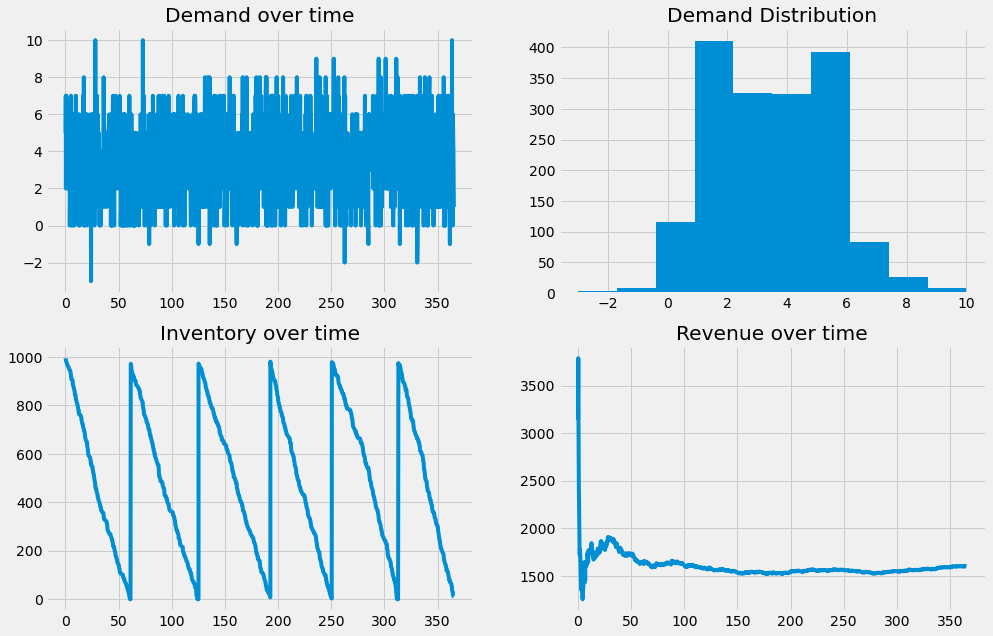

In [73]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(15, 10))


ax1 = fig.add_subplot(221)
ax1.plot(total_clock, total_demand)
ax1.title.set_text("Demand over time")

ax2 = fig.add_subplot(222)
ax2.hist(total_demand)
ax2.title.set_text("Demand Distribution")

ax3 = fig.add_subplot(223)
ax3.plot(total_clock, total_inventory)
ax3.title.set_text("Inventory over time")

ax4 = fig.add_subplot(224)
ax4.plot(total_clock, total_revenue)
ax4.title.set_text("Revenue over time")

plt.show()